 What is BER (Bit Error Rate)?
Think of BER like this:

📦 You send a package of bits (0s and 1s) from point A to point B.
📬 When it arrives, you check — did any bits get flipped (from 0 to 1 or 1 to 0) during the trip?

🧮 BER = (Number of wrong bits) ÷ (Total number of bits sent)

For example:

If you send 1,000 bits and 10 of them are wrong when received: → BER = 10 / 1000 = 0.01 (or 1%)

🎯 The lower the BER, the better the communication.






    

     What is SNR (Signal-to-Noise Ratio)?
    
Imagine you're talking to your friend in a noisy room:

🔊 Your voice = the "signal"

🔇 Background noise = the "noise"

SNR tells you how loud your voice is compared to the background noise.

🧮 SNR (in dB) = 10 × log₁₀(Power of Signal / Power of Noise)

If the signal is much stronger than the noise → SNR is high (good!)

If the noise is strong → SNR is low (bad!)

🔁 Higher SNR = Cleaner transmission = Fewer bit errors = Lower BER





🔗 Simple Relationship Between Them:

High SNR → Low BER → Good quality

Low SNR → High BER → Bad quality

Think of it like watching a movie with static:

If the screen is full of noise (low SNR), you miss details (high BER)

If it’s crystal clear (high SNR), everything is perfect (low BER)

BER at 12 dB SNR: 0.0499


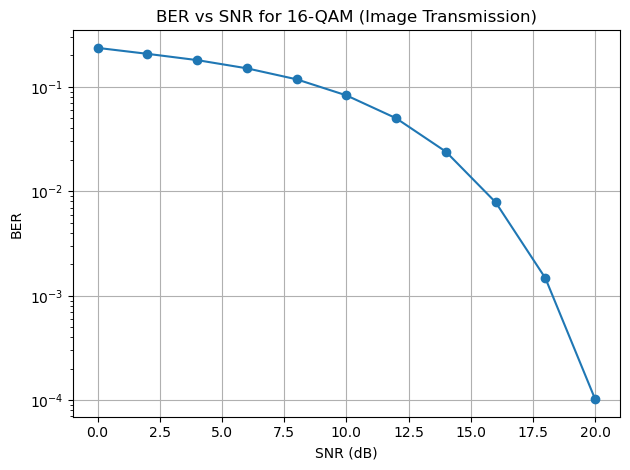

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io

# QAM Modulation
def qam_modulate(bits, M=16):
    k = int(np.log2(M))
    bits = bits[:len(bits) - (len(bits) % k)]
    symbols = np.reshape(bits, (-1, k))
    decimal = symbols.dot(1 << np.arange(k)[::-1])
    sqrt_M = int(np.sqrt(M))
    I = 2 * (decimal % sqrt_M) - sqrt_M + 1
    Q = 2 * (decimal // sqrt_M) - sqrt_M + 1
    return I + 1j * Q

# Add AWGN noise
def add_awgn_noise(signal, SNR_dB):
    SNR_linear = 10**(SNR_dB / 10)
    signal_power = np.mean(np.abs(signal)**2)
    noise_power = signal_power / SNR_linear
    noise = np.sqrt(noise_power / 2) * (np.random.randn(*signal.shape) + 1j*np.random.randn(*signal.shape))
    return signal + noise

# QAM Demodulation
def qam_demodulate(symbols, M=16):
    sqrt_M = int(np.sqrt(M))
    I = np.clip(np.round((np.real(symbols) + sqrt_M - 1) / 2), 0, sqrt_M - 1)
    Q = np.clip(np.round((np.imag(symbols) + sqrt_M - 1) / 2), 0, sqrt_M - 1)
    decimal = Q.astype(int) * sqrt_M + I.astype(int)
    k = int(np.log2(M))
    bits = ((decimal[:, None] & (1 << np.arange(k)[::-1])) > 0).astype(np.uint8)
    return bits.flatten()

# BER Calculation
def calculate_ber(original, received):
    length = min(len(original), len(received))
    return np.sum(original[:length] != received[:length]) / length

# Image to Bits
def image_to_bits(image_path_or_buffer):
    img = Image.open(image_path_or_buffer).convert("L")
    img_data = np.array(img).flatten()
    bits = np.unpackbits(img_data)
    return bits, img.size, img.mode

# Bits to Image
def bits_to_image_safe(bits, size, mode):
    total_pixels = size[0] * size[1]
    total_bits = total_pixels * 8
    bits = bits[:total_bits]
    pixel_data = np.packbits(bits)
    img_array = pixel_data.reshape((size[1], size[0]))
    return Image.fromarray(img_array.astype(np.uint8), mode)

# Transmission Pipeline
def transmit_image(bits, M, snr_db):
    modulated = qam_modulate(bits, M)
    noisy = add_awgn_noise(modulated, snr_db)
    received_bits = qam_demodulate(noisy, M)
    return received_bits

# Simulation
def main():
    # Load a real image from a folder
    image_path = "hhaw7sc3vad51.png"  # Replace with the actual path
    img = Image.open(image_path).convert('L')  # Convert to grayscale if needed

    buffer = io.BytesIO()
    img.save(buffer, format='PNG')
    buffer.seek(0)

    image_bits, image_size, image_mode = image_to_bits(buffer)

    # Test transmission at 12 dB
    snr_test = 12
    recovered_bits = transmit_image(image_bits, M=16, snr_db=snr_test)
    reconstructed_img = bits_to_image_safe(recovered_bits, image_size, image_mode)
    image_ber = calculate_ber(image_bits, recovered_bits)

    print(f"BER at {snr_test} dB SNR: {image_ber:.4f}")
    reconstructed_img.show()

    # Plot BER vs SNR
    SNR_range = np.arange(0, 21, 2)
    ber_list = []
    for snr in SNR_range:
        recovered = transmit_image(image_bits, M=16, snr_db=snr)
        ber = calculate_ber(image_bits, recovered)
        ber_list.append(ber)

    plt.figure()
    plt.semilogy(SNR_range, ber_list, marker='o')
    plt.xlabel('SNR (dB)')
    plt.ylabel('BER')
    plt.title('BER vs SNR for 16-QAM (Image Transmission)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


BER at 12 dB SNR: 0.0499


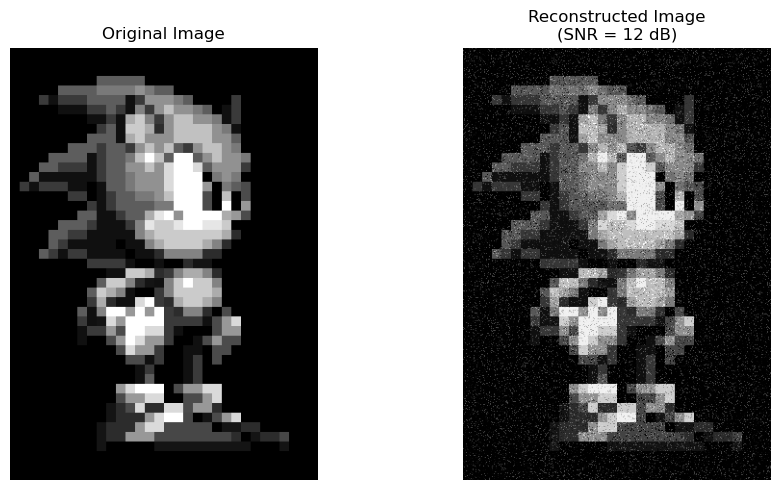

C:\Users\HP\AppData\Local\Temp\ipykernel_4852\2068019306.py:103: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


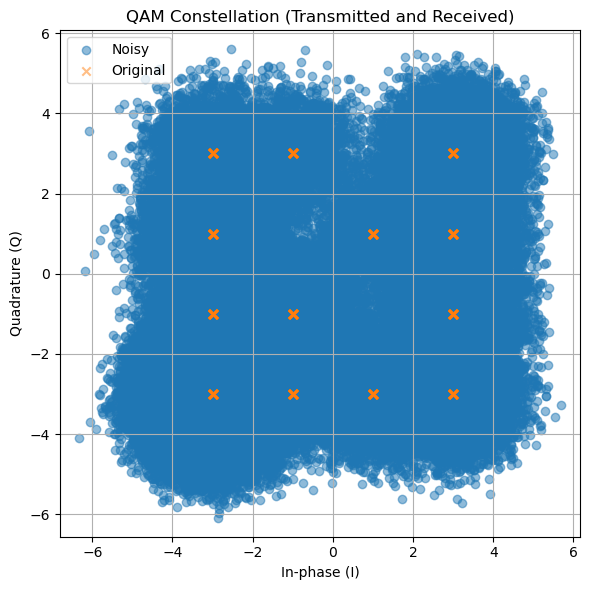

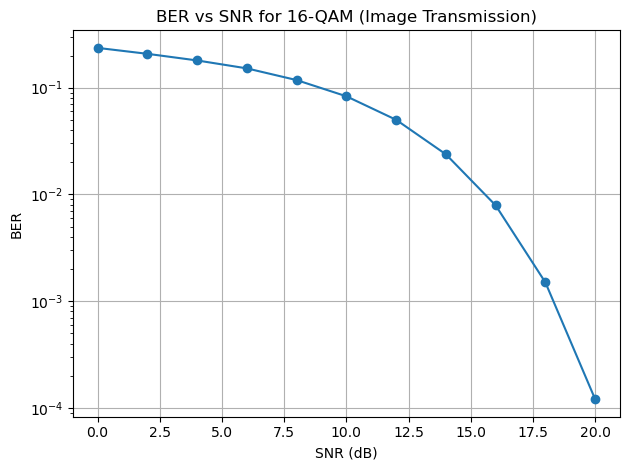

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io

# QAM Modulation
def qam_modulate(bits, M=16):
    k = int(np.log2(M))
    bits = bits[:len(bits) - (len(bits) % k)]
    symbols = np.reshape(bits, (-1, k))
    decimal = symbols.dot(1 << np.arange(k)[::-1])
    sqrt_M = int(np.sqrt(M))
    I = 2 * (decimal % sqrt_M) - sqrt_M + 1
    Q = 2 * (decimal // sqrt_M) - sqrt_M + 1
    return I + 1j * Q

# Add AWGN noise
def add_awgn_noise(signal, SNR_dB):
    SNR_linear = 10**(SNR_dB / 10)
    signal_power = np.mean(np.abs(signal)**2)
    noise_power = signal_power / SNR_linear
    noise = np.sqrt(noise_power / 2) * (np.random.randn(*signal.shape) + 1j*np.random.randn(*signal.shape))
    return signal + noise

# QAM Demodulation
def qam_demodulate(symbols, M=16):
    sqrt_M = int(np.sqrt(M))
    I = np.clip(np.round((np.real(symbols) + sqrt_M - 1) / 2), 0, sqrt_M - 1)
    Q = np.clip(np.round((np.imag(symbols) + sqrt_M - 1) / 2), 0, sqrt_M - 1)
    decimal = Q.astype(int) * sqrt_M + I.astype(int)
    k = int(np.log2(M))
    bits = ((decimal[:, None] & (1 << np.arange(k)[::-1])) > 0).astype(np.uint8)
    return bits.flatten()

# BER Calculation
def calculate_ber(original, received):
    length = min(len(original), len(received))
    return np.sum(original[:length] != received[:length]) / length

# Image to Bits
def image_to_bits(image_path_or_buffer):
    img = Image.open(image_path_or_buffer).convert("L")
    img_data = np.array(img).flatten()
    bits = np.unpackbits(img_data)
    return bits, img.size, img.mode

# Bits to Image
def bits_to_image_safe(bits, size, mode):
    total_pixels = size[0] * size[1]
    total_bits = total_pixels * 8
    bits = bits[:total_bits]
    pixel_data = np.packbits(bits)
    img_array = pixel_data.reshape((size[1], size[0]))
    return Image.fromarray(img_array.astype(np.uint8), mode)

# Transmission Pipeline
def transmit_image(bits, M, snr_db):
    modulated = qam_modulate(bits, M)
    noisy = add_awgn_noise(modulated, snr_db)
    received_bits = qam_demodulate(noisy, M)
    return received_bits, modulated, noisy

# Simulation
def main():
    image_path = "hhaw7sc3vad51.png"  # Replace with your image path
    img = Image.open(image_path).convert('L')

    buffer = io.BytesIO()
    img.save(buffer, format='PNG')
    buffer.seek(0)

    image_bits, image_size, image_mode = image_to_bits(buffer)

    snr_test = 12
    recovered_bits, modulated_signal, noisy_signal = transmit_image(image_bits, M=16, snr_db=snr_test)
    reconstructed_img = bits_to_image_safe(recovered_bits, image_size, image_mode)
    image_ber = calculate_ber(image_bits, recovered_bits)

    print(f"BER at {snr_test} dB SNR: {image_ber:.4f}")

    # Show original and reconstructed images side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(np.array(img), cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(np.array(reconstructed_img), cmap='gray')
    axes[1].set_title(f'Reconstructed Image\n(SNR = {snr_test} dB)')
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()

    # Plot constellation (modulated vs noisy)
    plt.figure(figsize=(6, 6))
    plt.scatter(np.real(noisy_signal), np.imag(noisy_signal), alpha=0.5, label='Noisy')
    plt.scatter(np.real(modulated_signal), np.imag(modulated_signal), alpha=0.5, marker='x', label='Original')
    plt.title('QAM Constellation (Transmitted and Received)')
    plt.xlabel('In-phase (I)')
    plt.ylabel('Quadrature (Q)')
    plt.grid(True)
    plt.legend()
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

    # Plot BER vs SNR
    SNR_range = np.arange(0, 21, 2)
    ber_list = []
    for snr in SNR_range:
        recovered, _, _ = transmit_image(image_bits, M=16, snr_db=snr)
        ber = calculate_ber(image_bits, recovered)
        ber_list.append(ber)

    plt.figure()
    plt.semilogy(SNR_range, ber_list, marker='o')
    plt.xlabel('SNR (dB)')
    plt.ylabel('BER')
    plt.title('BER vs SNR for 16-QAM (Image Transmission)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


BER at 12 dB SNR: 0.0491


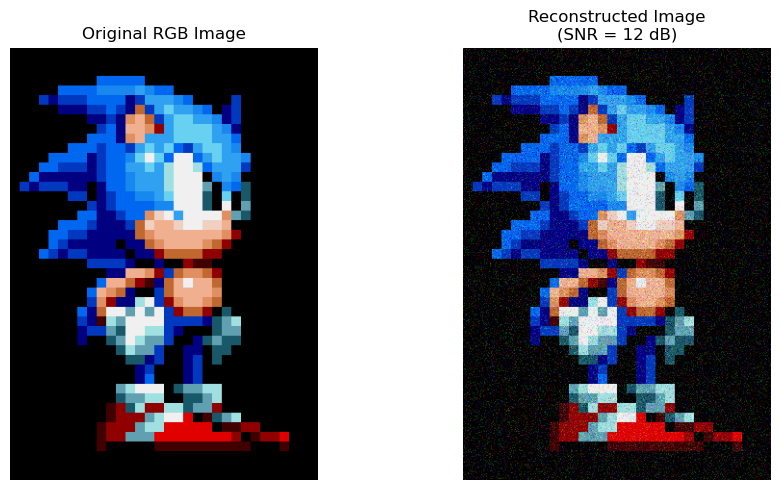

C:\Users\HP\AppData\Local\Temp\ipykernel_4852\2721933287.py:99: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


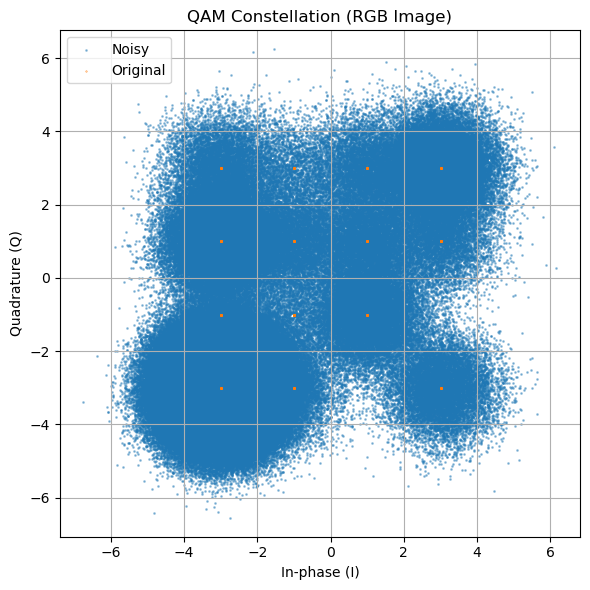

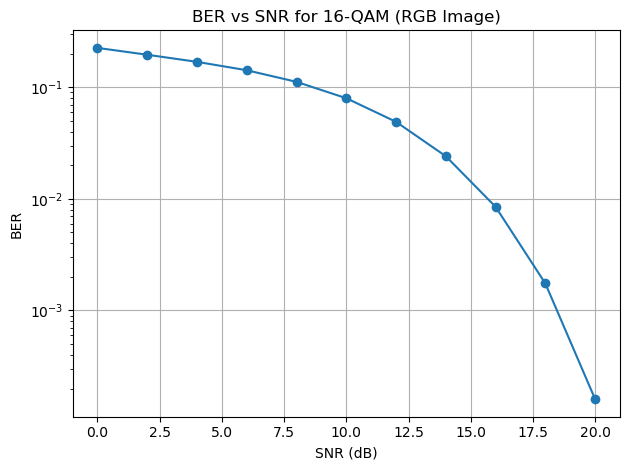

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io

# QAM Modulation
def qam_modulate(bits, M=16):
    k = int(np.log2(M))
    bits = bits[:len(bits) - (len(bits) % k)]
    symbols = np.reshape(bits, (-1, k))
    decimal = symbols.dot(1 << np.arange(k)[::-1])
    sqrt_M = int(np.sqrt(M))
    I = 2 * (decimal % sqrt_M) - sqrt_M + 1
    Q = 2 * (decimal // sqrt_M) - sqrt_M + 1
    return I + 1j * Q

# Add AWGN noise
def add_awgn_noise(signal, SNR_dB):
    SNR_linear = 10**(SNR_dB / 10)
    signal_power = np.mean(np.abs(signal)**2)
    noise_power = signal_power / SNR_linear
    noise = np.sqrt(noise_power / 2) * (np.random.randn(*signal.shape) + 1j*np.random.randn(*signal.shape))
    return signal + noise

# QAM Demodulation
def qam_demodulate(symbols, M=16):
    sqrt_M = int(np.sqrt(M))
    I = np.clip(np.round((np.real(symbols) + sqrt_M - 1) / 2), 0, sqrt_M - 1)
    Q = np.clip(np.round((np.imag(symbols) + sqrt_M - 1) / 2), 0, sqrt_M - 1)
    decimal = Q.astype(int) * sqrt_M + I.astype(int)
    k = int(np.log2(M))
    bits = ((decimal[:, None] & (1 << np.arange(k)[::-1])) > 0).astype(np.uint8)
    return bits.flatten()

# BER Calculation
def calculate_ber(original, received):
    length = min(len(original), len(received))
    return np.sum(original[:length] != received[:length]) / length

# Image to Bits (Color)
def image_to_bits(image):
    img_array = np.array(image)
    shape = img_array.shape  # (H, W, 3)
    bits = np.unpackbits(img_array.flatten())
    return bits, shape

# Bits to Image (Color)
def bits_to_image_safe(bits, shape):
    total_pixels = np.prod(shape)
    total_bits = total_pixels * 8
    bits = bits[:total_bits]
    pixels = np.packbits(bits)
    img_array = pixels.reshape(shape)
    return Image.fromarray(img_array.astype(np.uint8), 'RGB')

# Transmit each color channel
def transmit_image_color(bits, M, snr_db):
    modulated = qam_modulate(bits, M)
    noisy = add_awgn_noise(modulated, snr_db)
    received_bits = qam_demodulate(noisy, M)
    return received_bits, modulated, noisy

# Main simulation
def main():
    image_path = "hhaw7sc3vad51.png"  # Your RGB image
    img = Image.open(image_path).convert('RGB')

    bits, shape = image_to_bits(img)

    snr_test = 12
    received_bits, modulated_signal, noisy_signal = transmit_image_color(bits, M=16, snr_db=snr_test)
    reconstructed_img = bits_to_image_safe(received_bits, shape)
    ber = calculate_ber(bits, received_bits)

    print(f"BER at {snr_test} dB SNR: {ber:.4f}")

    # Show images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img)
    axes[0].set_title('Original RGB Image')
    axes[0].axis('off')

    axes[1].imshow(reconstructed_img)
    axes[1].set_title(f'Reconstructed Image\n(SNR = {snr_test} dB)')
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()

    # Constellation plot
    plt.figure(figsize=(6, 6))
    plt.scatter(np.real(noisy_signal), np.imag(noisy_signal), s=1, alpha=0.4, label='Noisy')
    plt.scatter(np.real(modulated_signal), np.imag(modulated_signal), s=1, alpha=0.4, marker='x', label='Original')
    plt.title('QAM Constellation (RGB Image)')
    plt.xlabel('In-phase (I)')
    plt.ylabel('Quadrature (Q)')
    plt.grid(True)
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # BER vs SNR
    SNR_range = np.arange(0, 21, 2)
    ber_list = []
    for snr in SNR_range:
        received_bits, _, _ = transmit_image_color(bits, M=16, snr_db=snr)
        ber = calculate_ber(bits, received_bits)
        ber_list.append(ber)

    plt.figure()
    plt.semilogy(SNR_range, ber_list, marker='o')
    plt.xlabel('SNR (dB)')
    plt.ylabel('BER')
    plt.title('BER vs SNR for 16-QAM (RGB Image)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


In [8]:
symbols_all = np.arange(16)
bits_all = np.array([[int(b) for b in np.binary_repr(i, width=4)] for i in symbols_all], dtype=np.uint8).flatten()
qam_modulate(bits_all, M=16)

array([-3.-3.j, -1.-3.j,  1.-3.j,  3.-3.j, -3.-1.j, -1.-1.j,  1.-1.j,
        3.-1.j, -3.+1.j, -1.+1.j,  1.+1.j,  3.+1.j, -3.+3.j, -1.+3.j,
        1.+3.j,  3.+3.j])